In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# Time series analysis;Predicting the Burned Area of Wildfires

## Problem statement
Wildfires in Zimbabwe have caused significant damage, emphasizing the need for accurate prediction of their occurrence. This project aims to analyze monthly burned area percentages in specific Zimbabwean regions from 2014 to 2017 to inform future wildfire prediction models and mitigation strategies.



In [2]:
data = pd.read_csv('/content/Train.csv')

In [3]:
data

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83143,528_2013-12-01,-22.108835,30.737029,0.0,1210,324,142,1535,127,6,...,0.0,0.0,0.000000,0.0,0.008768,0.000000,0.991232,0.000000,0.0,0.132015
83144,529_2013-12-01,-22.108835,30.987029,0.0,1295,195,126,1490,136,7,...,0.0,0.0,0.000000,0.0,0.216560,0.000000,0.783440,0.000000,0.0,0.124280
83145,530_2013-12-01,-22.108835,31.237029,0.0,1254,272,111,1527,132,7,...,0.0,0.0,0.000000,0.0,0.392621,0.000000,0.607379,0.000000,0.0,0.115464
83146,531_2013-12-01,-22.108835,31.487029,0.0,1221,289,68,1510,128,6,...,0.0,0.0,0.000000,0.0,0.637696,0.000000,0.362304,0.000000,0.0,0.119895


## Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset
- converting date column into datetime format

In [4]:
data.columns

Index(['ID', 'lat', 'lon', 'burn_area', 'climate_aet', 'climate_def',
       'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro',
       'climate_soil', 'climate_srad', 'climate_swe', 'climate_tmmn',
       'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs', 'elevation',
       'landcover_0', 'landcover_1', 'landcover_2', 'landcover_3',
       'landcover_4', 'landcover_5', 'landcover_6', 'landcover_7',
       'landcover_8', 'precipitation'],
      dtype='object')

In [5]:
data.shape

(83148, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [7]:
data.isnull().sum()

,0
ID,0
lat,0
lon,0
burn_area,0
climate_aet,0
climate_def,0
climate_pdsi,0
climate_pet,0
climate_pr,0
climate_ro,0


In [8]:
data.duplicated().sum()

0

In [9]:
# splitting the ID column to obtain the date and area Id

#date
data['date'] = pd.to_datetime(data['ID'].apply(lambda x: x.split('_')[1]))

#ID/location
data['Id'] = pd.to_numeric(data['ID'].apply(lambda x: x.split('_')[0]))

In [10]:
data

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,date,Id
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932,2001-01-01,0
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093,2001-01-01,1
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109,2001-01-01,2
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418,2001-01-01,3
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621,2001-01-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83143,528_2013-12-01,-22.108835,30.737029,0.0,1210,324,142,1535,127,6,...,0.000000,0.0,0.008768,0.000000,0.991232,0.000000,0.0,0.132015,2013-12-01,528
83144,529_2013-12-01,-22.108835,30.987029,0.0,1295,195,126,1490,136,7,...,0.000000,0.0,0.216560,0.000000,0.783440,0.000000,0.0,0.124280,2013-12-01,529
83145,530_2013-12-01,-22.108835,31.237029,0.0,1254,272,111,1527,132,7,...,0.000000,0.0,0.392621,0.000000,0.607379,0.000000,0.0,0.115464,2013-12-01,530
83146,531_2013-12-01,-22.108835,31.487029,0.0,1221,289,68,1510,128,6,...,0.000000,0.0,0.637696,0.000000,0.362304,0.000000,0.0,0.119895,2013-12-01,531


- The data has no missing values or duplicates
- The data is comprised of numerical features only
- The data contains the information of areas experiencing  burned areas indexed overtime

## Data visualization
We are going to approach this as a time series problem as the fires have been occuring in various places(Ids) from 2001 to 2013

**Sample Features to visualize:**
- **precipitation**.   Merged microwave/IR precipitation estimate
- **climate_tmmx**    Maximum temperature
- **climate_tmmn**    Minimum temperature

***Target:***
- **burn_area**   Percentage of the area burnt



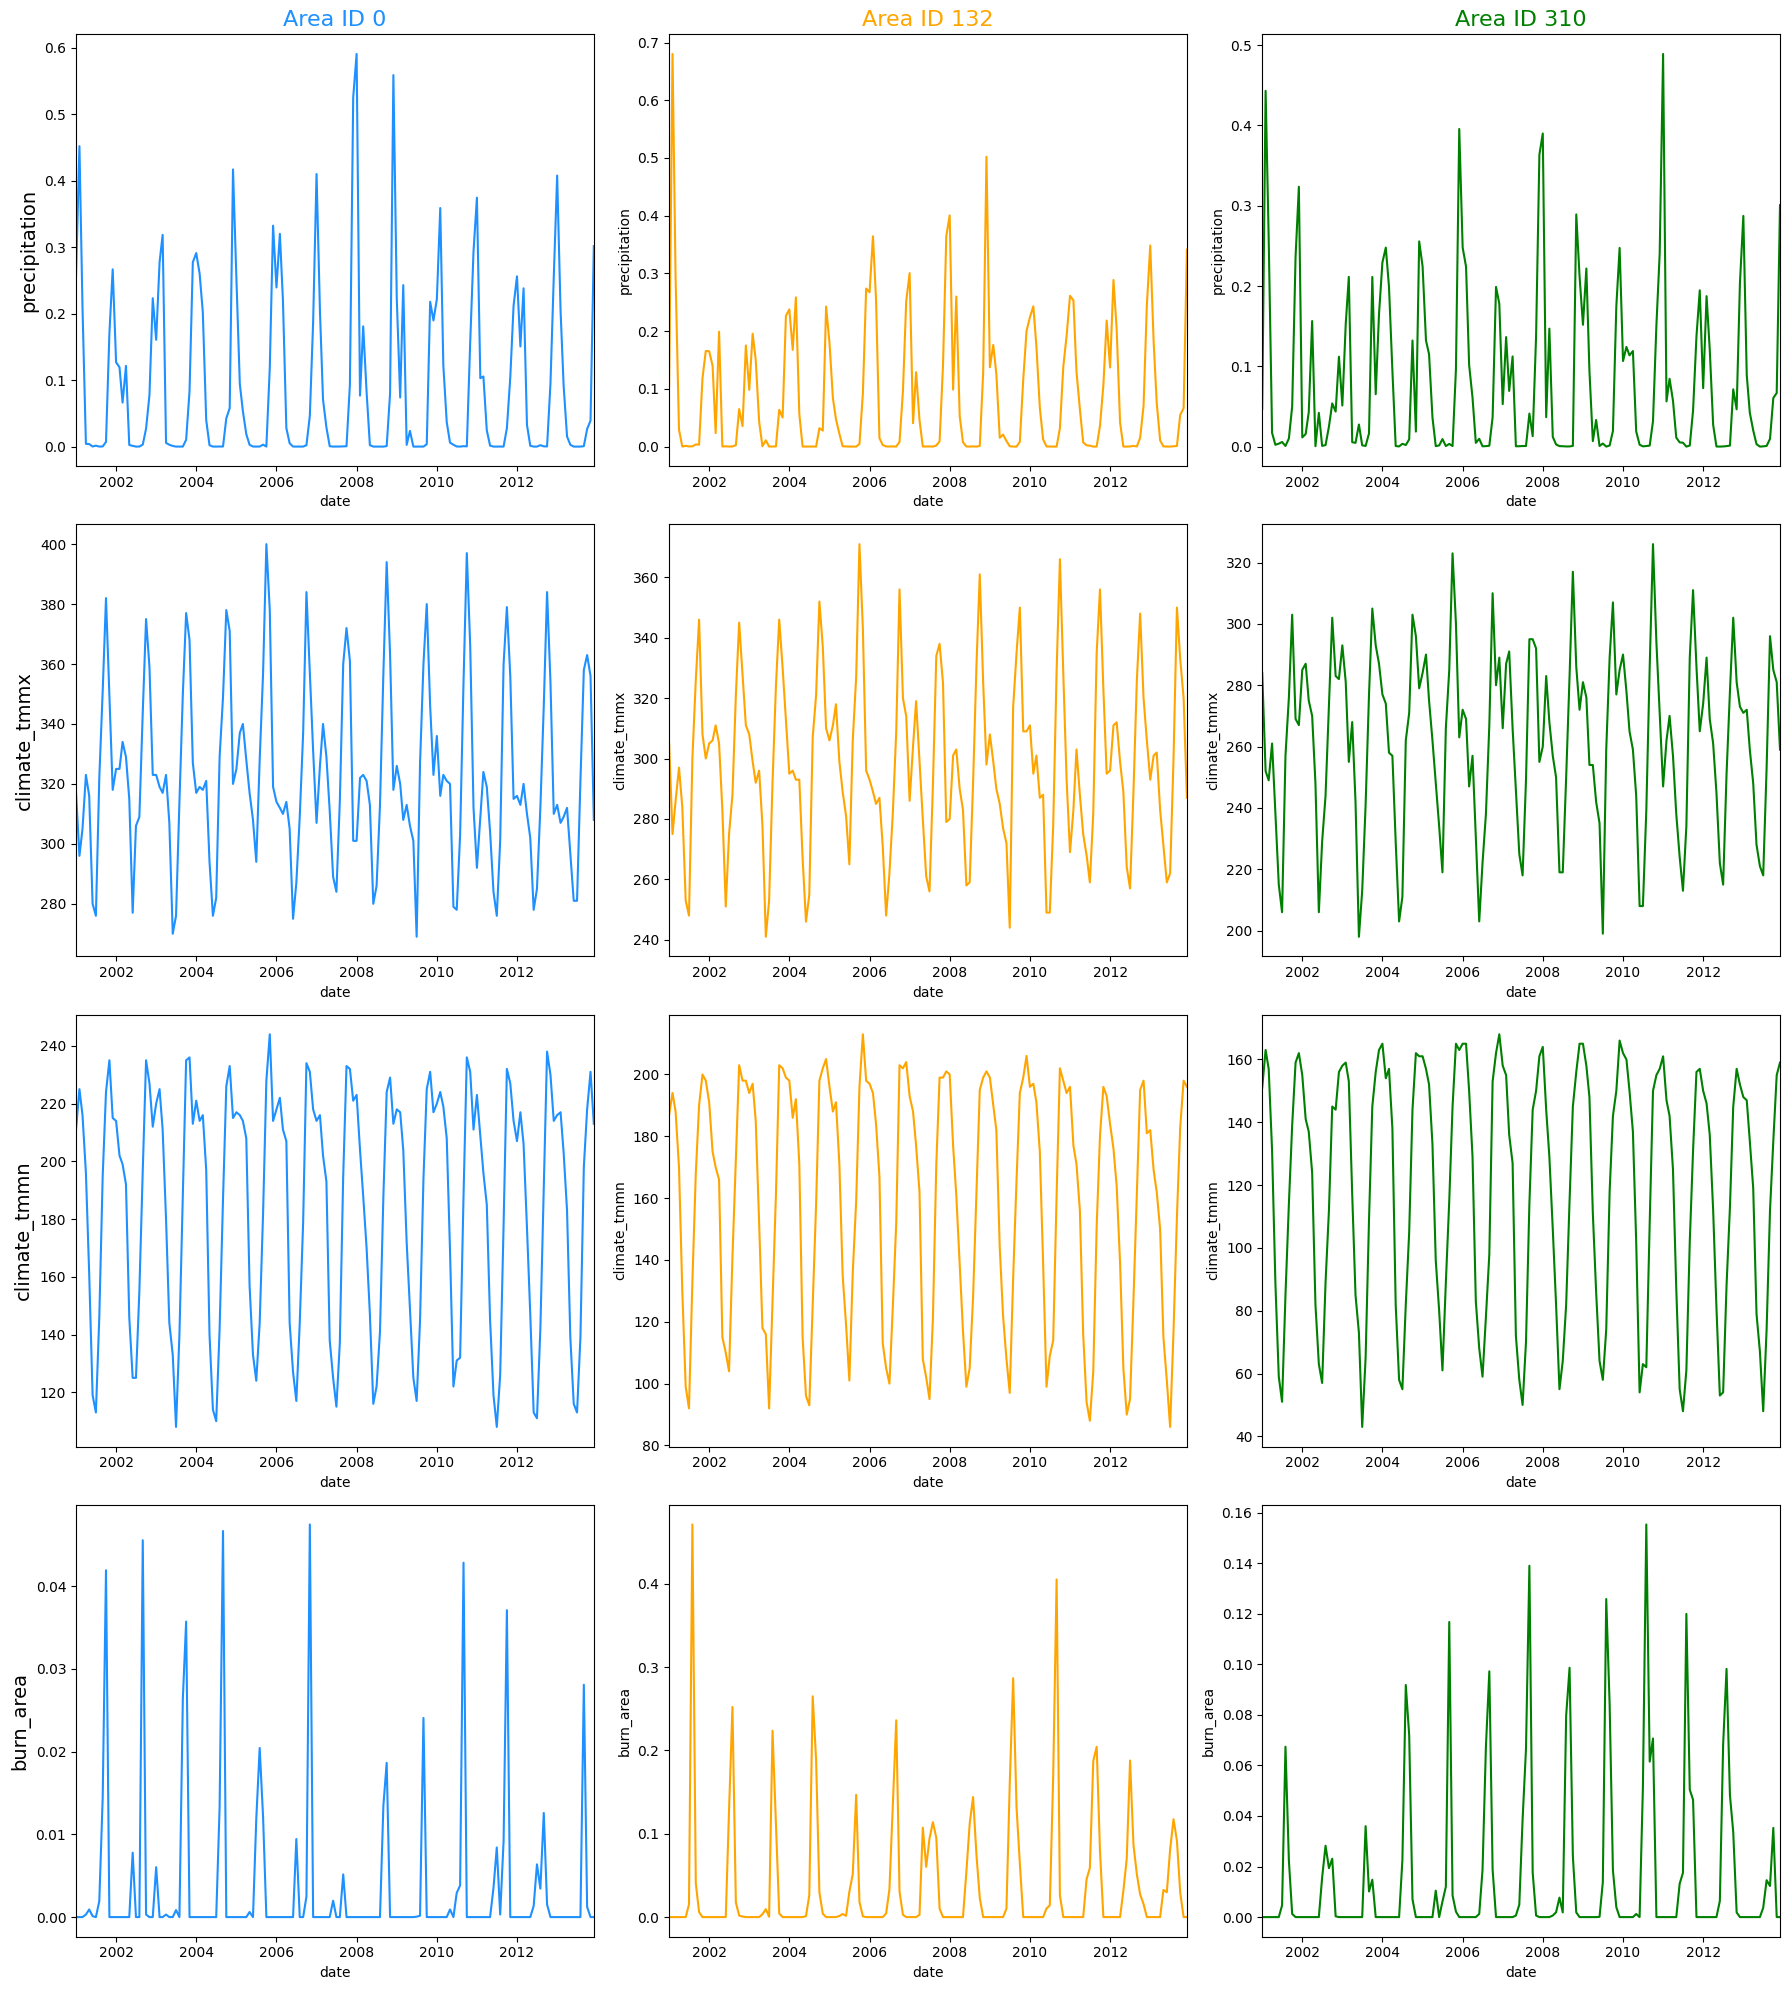

In [11]:
# Define the areas and  features
areas = [0, 132, 310]
features = ['precipitation', 'climate_tmmx', 'climate_tmmn', 'burn_area']
colors = ['dodgerblue', 'orange', 'green']

fig, axes = plt.subplots(nrows=len(features), ncols=len(areas), figsize=(18, 20))

# Looping  over each feature and area
for row, feature in enumerate(features):
    for col, area_id in enumerate(areas):
        # Filter data for the specific area
        area_data = data.loc[data.Id == area_id]

        # Create a line plot for each feature and area, with a unique color for each area
        sns.lineplot(x=area_data['date'], y=area_data[feature], ax=axes[row, col], color=colors[col])

        # Set title for each area in the top row
        if row == 0:
            axes[row, col].set_title(f'Area ID {area_id}', fontsize=16, color=colors[col])

        # Set the y-axis label for each feature in the left column
        if col == 0:
            axes[row, col].set_ylabel(feature, fontsize=14)

        # Set the x-axis limits to a specific date range
        axes[row, col].set_xlim([pd.to_datetime("2001-01-01"), pd.to_datetime("2013-12-01")])

plt.tight_layout()
plt.show()



From the plot we can see that the data tends steady with some spikes on both climate precipitation and burned areas

### Time series decomposition

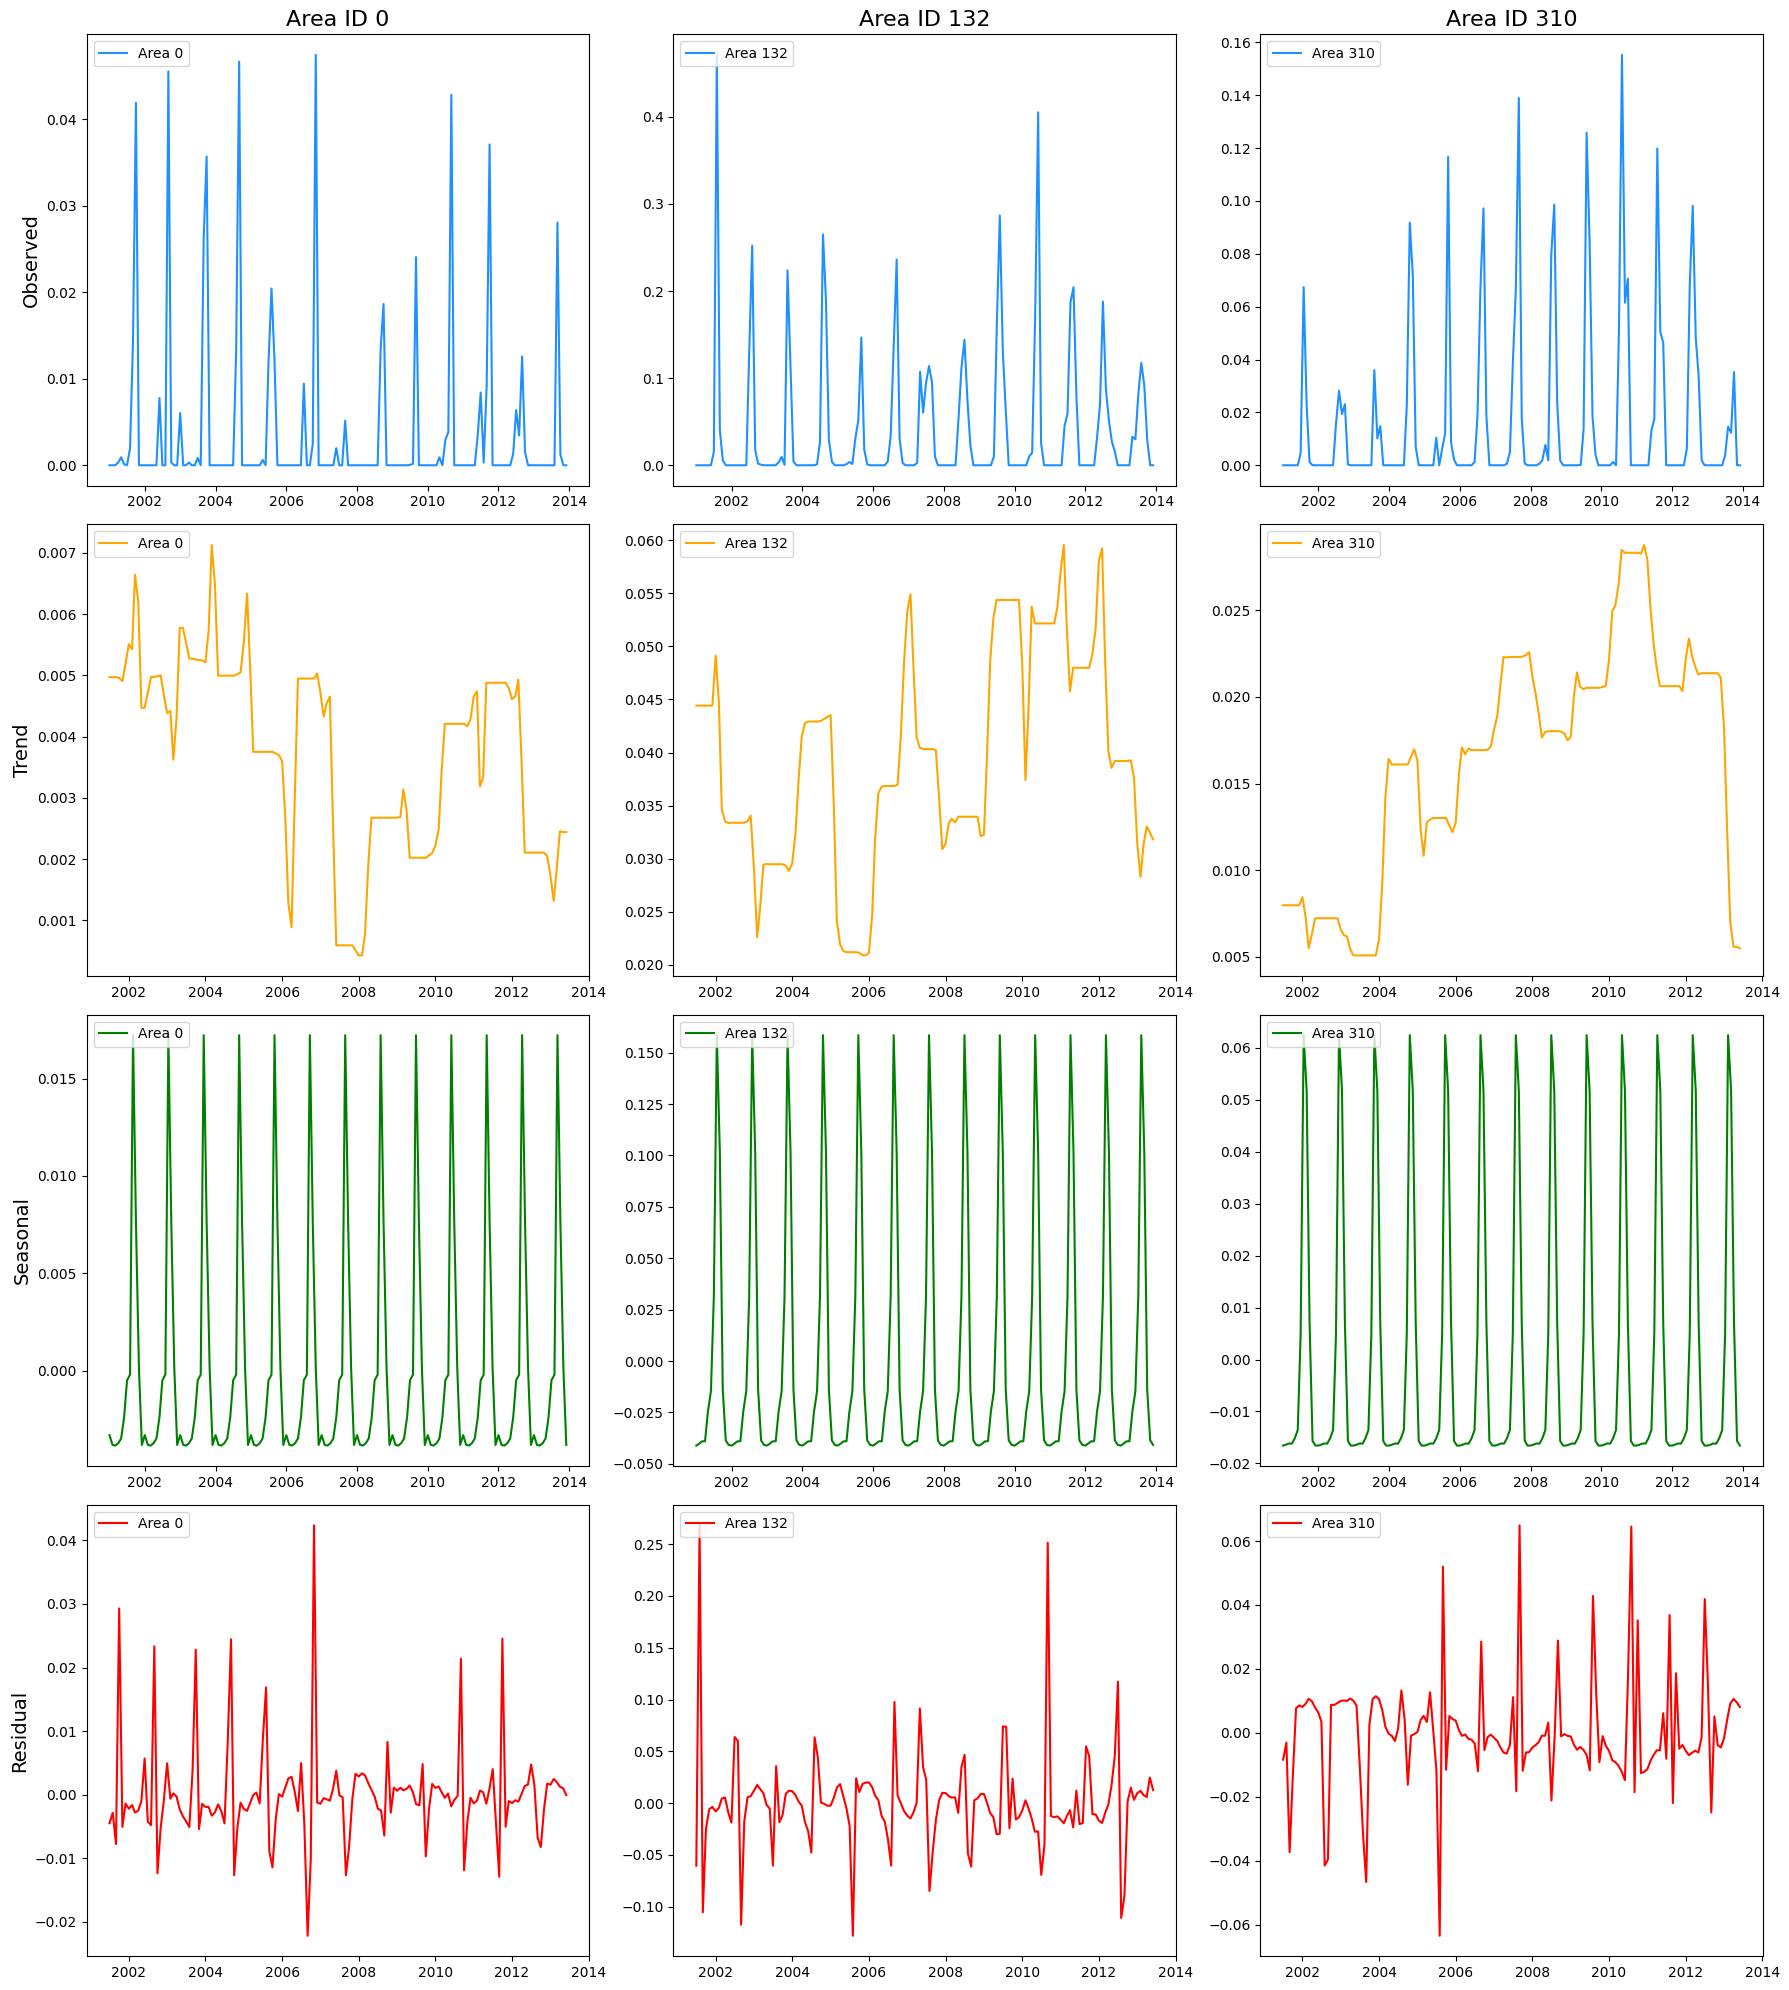

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample Area IDs
areas = [0, 132, 310]
decompositions = {}

# Perform decomposition for each area and store in a dictionary
for area_id in areas:
    area_data = data.loc[data.Id == area_id].set_index('date')
    decompositions[area_id] = seasonal_decompose(area_data['burn_area'], model='additive', period=12)


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

# labeling
components = ['Observed', 'Trend', 'Seasonal', 'Residual']

# Looping over each component and each area to plot them
for row, component in enumerate(components):
    for col, area_id in enumerate(areas):
        ax = axes[row, col]
        if component == 'Observed':
            ax.plot(decompositions[area_id].observed, label=f'Area {area_id}', color='dodgerblue')
        elif component == 'Trend':
            ax.plot(decompositions[area_id].trend, label=f'Area {area_id}', color='orange')
        elif component == 'Seasonal':
            ax.plot(decompositions[area_id].seasonal, label=f'Area {area_id}', color='green')
        elif component == 'Residual':
            ax.plot(decompositions[area_id].resid, label=f'Area {area_id}', color='red')

        # Set titles and labels
        if col == 0:
            ax.set_ylabel(component, fontsize=14)
        if row == 0:
            ax.set_title(f'Area ID {area_id}', fontsize=16)

        ax.legend(loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Data preprossesing





### Stationarity
- constant mean and mean is not time-dependent
- constant variance and variance is not time-dependent
- constant covariance and covariance is not time-dependent


*The check for stationarity can be done via three different approaches:*

**visually:** plot time series and check for trends or seasonality                                           
**basic statistics:** split time series and compare the mean and variance of each partition.                         
**statistical test:** Augmented Dickey Fuller test

In [13]:
from statsmodels.tsa.stattools import adfuller

#Areas to test
areas = [0, 132, 310]

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop NaN values for the test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("Conclusion: The time series is stationary.")
    else:
        print("Conclusion: The time series is non-stationary.")

# Apply the ADF test on burn_area for each area
for area_id in areas:
    print(f'\nADF Test for Area ID {area_id}')
    area_data = data.loc[data.Id == area_id]
    adf_test(area_data['burn_area'])




ADF Test for Area ID 0
ADF Statistic: -2.8385060388214014
p-value: 0.05298047806634865
Critical Values:
   1%: -3.4769274060112707
   5%: -2.8819726324025625
   10%: -2.577665408088415
Conclusion: The time series is non-stationary.

ADF Test for Area ID 132
ADF Statistic: -3.1158855450448817
p-value: 0.025399705274822843
Critical Values:
   1%: -3.476597917537401
   5%: -2.8818291230495543
   10%: -2.5775887982253085
Conclusion: The time series is stationary.

ADF Test for Area ID 310
ADF Statistic: -1.3412482359080315
p-value: 0.6100964063478581
Critical Values:
   1%: -3.476597917537401
   5%: -2.8818291230495543
   10%: -2.5775887982253085
Conclusion: The time series is non-stationary.


From the inference above we can come to a conclusion that our  data is mixed with both stationary and non stationary time series.

In [14]:
# Function to perform ADF test and check stationarity
def check_stationarity(series, significance_level=0.05):
    # Skip the test if all values are constant
    if series.nunique() <= 1:
        return False  # Mark as non-stationary for now
    adf_result = adfuller(series)
    p_value = adf_result[1]
    return p_value < significance_level  # Returns True if stationary

# Loop through areas to identify stationary and non-stationary areas
def identify_stationary_areas(data, area_column, target_column):
    stationary_areas = []
    non_stationary_areas = []
    constant_areas = []

    for area_id in data[area_column].unique():
        # Filter data for the specific area
        area_data = data[data[area_column] == area_id][target_column].dropna()

        # Check if data is constant
        if area_data.nunique() <= 1:
            constant_areas.append(area_id)
            print(f"Area ID {area_id} has constant values and is skipped.")
            continue

        # Test for stationarity
        is_stationary = check_stationarity(area_data)

        if is_stationary:
            stationary_areas.append(area_id)
        else:
            non_stationary_areas.append(area_id)

    print(f"Total Stationary Areas: {len(stationary_areas)}")
    print(f"Total Non-Stationary Areas: {len(non_stationary_areas)}")
    print(f"Total Constant Areas (skipped): {len(constant_areas)}")

    return stationary_areas, non_stationary_areas

# Apply the function to the dataset
stationary_areas, non_stationary_areas = identify_stationary_areas(data, area_column='Id', target_column='burn_area')





Area ID 297 has constant values and is skipped.
Area ID 318 has constant values and is skipped.
Area ID 319 has constant values and is skipped.
Area ID 320 has constant values and is skipped.
Area ID 321 has constant values and is skipped.
Area ID 344 has constant values and is skipped.
Area ID 345 has constant values and is skipped.
Area ID 347 has constant values and is skipped.
Area ID 352 has constant values and is skipped.
Area ID 369 has constant values and is skipped.
Area ID 376 has constant values and is skipped.
Area ID 393 has constant values and is skipped.
Area ID 398 has constant values and is skipped.
Area ID 410 has constant values and is skipped.
Area ID 447 has constant values and is skipped.
Area ID 448 has constant values and is skipped.
Area ID 451 has constant values and is skipped.
Area ID 480 has constant values and is skipped.
Area ID 481 has constant values and is skipped.
Area ID 498 has constant values and is skipped.
Area ID 499 has constant values and is s

23 areas were skipped because their values were not changing overtime.Next we will make the 205 areas to be stationary for the  usage of traditional time series model like ARIMA.

In [15]:
# Function to apply seasonal differencing on non-stationary areas and check if they become stationary
def apply_seasonal_differencing_and_retest(data, area_column, target_column, non_stationary_areas, seasonal_period=12):
    transformed_stationary = []
    transformed_non_stationary = []

    for area_id in non_stationary_areas:
        # Filter data for the specific area and apply seasonal differencing
        area_data = data[data[area_column] == area_id][target_column].dropna()
        seasonal_diff_data = area_data.diff(periods=seasonal_period).dropna()  # Apply seasonal differencing

        # Re-test for stationarity on the seasonally differenced data
        is_stationary_after_diff = check_stationarity(seasonal_diff_data)

        if is_stationary_after_diff:
            transformed_stationary.append(area_id)
        else:
            transformed_non_stationary.append(area_id)
    return transformed_stationary, transformed_non_stationary

# Apply the seasonal differencing and re-test for stationarity
transformed_stationary, transformed_non_stationary = apply_seasonal_differencing_and_retest(
    data, area_column='Id', target_column='burn_area', non_stationary_areas=non_stationary_areas, seasonal_period=12
)

# Summary of results after seasonal differencing
print("Stationary Areas after Seasonal Differencing:", transformed_stationary)
print("Still Non-Stationary Areas:", transformed_non_stationary)



Stationary Areas after Seasonal Differencing: [0, 7, 10, 11, 22, 23, 25, 26, 31, 32, 33, 34, 39, 40, 41, 43, 46, 47, 48, 50, 52, 53, 54, 55, 56, 59, 61, 64, 67, 68, 69, 70, 71, 72, 73, 76, 77, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 103, 106, 109, 112, 113, 115, 116, 117, 119, 120, 121, 127, 130, 131, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 160, 161, 162, 163, 165, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 191, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 219, 222, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 253, 255, 256, 257, 258, 259, 260, 261, 262, 266, 267, 275, 276, 277, 281, 282, 283, 284, 285, 287, 288, 293, 294, 298, 299, 300, 305, 307, 309, 310, 311, 312, 313, 314, 315, 316, 329, 331, 332, 334, 335, 336, 342, 348, 357, 358, 359, 360, 361, 362, 364, 380, 381, 382, 383, 384, 385, 389, 390, 391, 397, 400, 401, 403, 404, 407, 408, 409, 424, 450, 473, 478, 486, 491, 492]
Stil

In [16]:
# Applying first-order differencing on the remaining non-stationary areas
remaining_non_stationary_areas = [232, 286, 402, 523]
final_stationary_after_diff = []
final_non_stationary_after_diff = []

for area_id in remaining_non_stationary_areas:
    # Filter data for the specific area
    area_data = data[data['Id'] == area_id]['burn_area'].dropna()

    # Apply first-order differencing
    differenced_data = area_data.diff().dropna()  # Drop NaN resulting from differencing

    # Re-test stationarity after differencing
    is_stationary_after_diff = check_stationarity(differenced_data)

    if is_stationary_after_diff:
        final_stationary_after_diff.append(area_id)
        print(f"Area ID {area_id} becomes stationary after differencing.")
    else:
        final_non_stationary_after_diff.append(area_id)
        print(f"Area ID {area_id} remains non-stationary even after differencing.")

# Final results
print("\nDifferencing Results:")
print("Stationary Areas after Differencing:", final_stationary_after_diff)
print("Still Non-Stationary Areas:", final_non_stationary_after_diff)


Area ID 232 becomes stationary after differencing.
Area ID 286 becomes stationary after differencing.
Area ID 402 becomes stationary after differencing.
Area ID 523 becomes stationary after differencing.

Differencing Results:
Stationary Areas after Differencing: [232, 286, 402, 523]
Still Non-Stationary Areas: []


We did it ....We were able to difference the time series data.Lets dive into modelling.

# Modelling

Time series can be either univariate or multivariate:

- Univariate time series only has a single time-dependent variable.
- Multivariate time series have a multiple time-dependent variable.

Remember that the country is divided into 533 areas and each area has its own historical data. Therefore, to build a time series model, we will need to filter the data per area, build and test the models in a loop, and finally append the RMSE values to a list.


## Univariate modelling

Here we will use;
- AUTO-ARIMA
- SARIMA

In [17]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.6 MB/s eta 0:00:00


In [18]:
## data splitting

X_train = data[data['date'] < '2011-01-01']
y_test = data[data['date'] >= '2011-01-01']
print(X_train.shape, y_test.shape)


(63960, 31) (19188, 31)


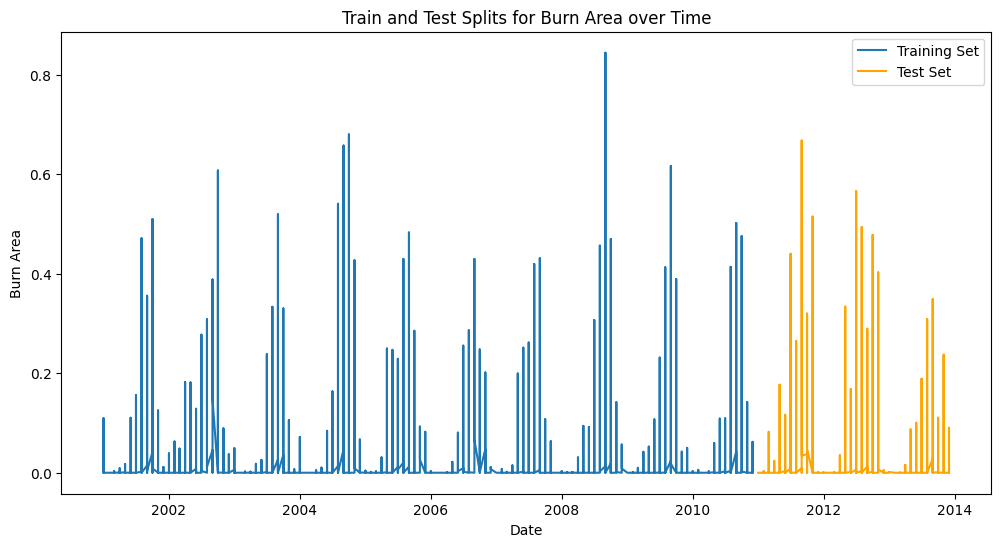

In [19]:
# Plotting the train and test splits
plt.figure(figsize=(12, 6))
plt.plot(X_train['date'], X_train['burn_area'], label='Training Set')
plt.plot(y_test['date'], y_test['burn_area'], label='Test Set', color='orange')
plt.xlabel('Date')
plt.ylabel('Burn Area')
plt.title('Train and Test Splits for Burn Area over Time')
plt.legend()
plt.show()


### Simple Auto ARIMA model
AUTO ARIMA is a model selection algorithm that automatically finds the best parameters for an ARIMA (Auto-Regressive Integrated Moving Average) model by testing different combinations of the model’s order terms (p, d, q). It evaluates various configurations through techniques like grid search or stepwise selection to minimize an information criterion (usually AIC or BIC), balancing model fit with simplicity.

In [20]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


# Initialize an empty list to store RMSE values for each area
rmse_values = []

# Loop through each area ID
for Id in data['Id'].unique():
    # Filter the data for the current area ID
    train_area = data.loc[data.Id == Id]

    # Convert 'date' column to datetime and set as index
    train_area['date'] = pd.to_datetime(train_area['date'])
    train_area = train_area.set_index('date')

    # Train Test Split using the DatetimeIndex
    X_train_area = train_area.loc[train_area.index < '2011-01-01']
    y_test_area = train_area.loc[train_area.index >= '2011-01-01']

    # Simple model
    baseline_model = auto_arima(X_train_area['burn_area'], seasonal=True)

    # Forecast the same length as the test data
    forecast_length = len(y_test_area)
    predicted_data = baseline_model.predict(n_periods=forecast_length)
    predicted_data = pd.Series(predicted_data, index=y_test_area.index)

    # Calculate RMSE for the current area ID
    rmse_area = np.sqrt(mean_squared_error(y_test_area['burn_area'], predicted_data))
    rmse_values.append(rmse_area)

# Calculate the overall RMSE by averaging the RMSE values of all areas
overall_rmse = np.mean(rmse_values)
print('Overall Test RMSE:', overall_rmse)

Overall Test RMSE: 0.017364251468702324


### Simple SARIMA model
- A SARIMA (Seasonal Auto-Regressive Integrated Moving Average) model extends ARIMA by adding terms to account for seasonality in time series data, making it suitable for data with repeating seasonal patterns.

In [22]:
# Initialize an empty list to store RMSE values for each area
rmse_values = []

# Loop through each area ID
for Id in data['Id'].unique():
    # Filter the data for the current area ID
    train_area = data.loc[data.Id == Id]

    # Convert 'date' column to datetime and set as index
    train_area['date'] = pd.to_datetime(train_area['date'])
    train_area = train_area.set_index('date')

    # Train Test Split using the DatetimeIndex
    X_train_area = train_area.loc[train_area.index < '2011-01-01']
    y_test_area = train_area.loc[train_area.index >= '2011-01-01']

    # Simple model with adjustments
    try:
        SARIMA_model = auto_arima(
            X_train_area['burn_area'],
            m=12,
            seasonal=True,
            start_p=0, start_q=0,
            max_p=2, max_q=2,
            test='kpss',
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True,
            trace=False
        )

        # Forecast the same length as the test data
        forecast_length = len(y_test_area)
        predicted_data = SARIMA_model.predict(n_periods=forecast_length)
        predicted_data = pd.Series(predicted_data, index=y_test_area.index)

        # Calculate RMSE for the current area ID
        rmse_area = np.sqrt(mean_squared_error(y_test_area['burn_area'], predicted_data))
        rmse_values.append(rmse_area)

    except ValueError as e:
        print(f"Skipping area ID {Id}: {e}")
        continue

# Calculate the overall RMSE by averaging the RMSE values of all areas
if rmse_values:
    overall_rmse = np.mean(rmse_values)
    print('Overall Test RMSE:', overall_rmse)
else:
    print("No valid RMSE values were computed.")



Skipping area ID 102: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Skipping area ID 368: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Overall Test RMSE: 0.014515395688375331


## Multivariate analysis

### SARIMAX
- SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous variables) is an extension of the SARIMA model that not only accounts for seasonality, trends, and autocorrelations in time series data but also incorporates the influence of external (exogenous) variables. This makes SARIMAX suitable for forecasting time series data where the target variable is influenced by both its own past behavior and additional explanatory variables.

- We are going to use sklearn to  select the best 10 features to act as our exogenous features.This features will be used as our exogenous features when building our SARIMAX model

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd

# Feature Selection
X = data.drop(['burn_area', 'date', 'ID', 'Id'], axis=1)
y = data['burn_area']

# Apply SelectKBest with f_regression
bestfeatures = SelectKBest(k=10, score_func=f_regression)
fit = bestfeatures.fit(X, y)

# Get feature scores and normalize to percentages
feature_scores = fit.scores_
feature_percentages = (feature_scores / feature_scores.sum()) * 100

# Create a DataFrame to display feature names with their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': feature_scores,
    'Importance (%)': feature_percentages
}).sort_values(by='Importance (%)', ascending=False)

# Print the top 10 features
print("Top 10 Features (by importance):")
print(feature_importance_df.head(10))




Top 10 Features (by importance):
          Feature        Score  Importance (%)
3     climate_def  7046.403609       16.792970
15     climate_vs  6106.151375       14.552163
13    climate_vap  4283.618393       10.208708
14    climate_vpd  4227.879610       10.075871
2     climate_aet  3905.259235        9.307003
6      climate_pr  2490.415302        5.935151
26  precipitation  2451.049298        5.841334
5     climate_pet  2440.716482        5.816709
9    climate_srad  2198.971248        5.240582
22    landcover_5  1965.310218        4.683722


In [21]:
exog_features = feature_importance_df['Feature'].head(10).tolist()
exog_features

['climate_def',
 'climate_vs',
 'climate_vap',
 'climate_vpd',
 'climate_aet',
 'climate_pr',
 'precipitation',
 'climate_pet',
 'climate_srad',
 'landcover_5']

In [22]:

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Initialize an empty list to store RMSE values for each area
rmse_values = []

# Loop through each area ID
for Id in data['Id'].unique():
    # Filter the data for the current area ID
    train_area = data.loc[data.Id == Id]

    # Convert 'date' column to datetime and set as index
    train_area['date'] = pd.to_datetime(train_area['date'])
    train_area = train_area.set_index('date')

    # Separate exogenous features
    exog_data = train_area[exog_features]

    # Train Test Split using the DatetimeIndex
    X_train_area = train_area.loc[train_area.index < '2011-01-01']
    y_test_area = train_area.loc[train_area.index >= '2011-01-01']

    # Exogenous features split
    exog_train = exog_data.loc[exog_data.index < '2011-01-01']
    exog_test = exog_data.loc[exog_data.index >= '2011-01-01']

    # Simple model with adjustments
    try:
        SARIMAX_model = auto_arima(
            X_train_area['burn_area'],
            exogenous=exog_train,
            m=12,
            seasonal=True,
            start_p=0, start_q=0,
            max_p=2, max_q=2,
            test='kpss',
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True,
            trace=False
        )

        # Forecast the same length as the test data
        forecast_length = len(y_test_area)
        predicted_data = SARIMAX_model.predict(n_periods=forecast_length, exogenous=exog_test)
        predicted_data = pd.Series(predicted_data, index=y_test_area.index)

        # Calculate RMSE for the current area ID
        rmse_area = np.sqrt(mean_squared_error(y_test_area['burn_area'], predicted_data))
        rmse_values.append(rmse_area)

    except ValueError as e:
        print(f"Skipping area ID {Id}: {e}")
        continue

# Calculate the overall RMSE by averaging the RMSE values of all areas
if rmse_values:  # Ensure we have at least one valid RMSE value
    overall_rmse = np.mean(rmse_values)
    print('Overall Test RMSE:', overall_rmse)
else:
    print("No valid RMSE values were computed.")


Skipping area ID 102: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Skipping area ID 368: All lag values up to 'maxlag' produced singular matrices. Consider using a longer series, a different lag term or a different test.
Overall Test RMSE: 0.014515395688375331


- The overall RMSE does not improve even after adding the features implying that in our case SARIMA is best model.
- The SARIMA model perfomed very well compared to ARIMA because the data is highly seasonal.
- Further tuning like introducing the Kalman Filter could improve the model accuracy.